In [1]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
#import tensorflow as tf

#  Import and read the WELFake_Dataset.csv.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
news_df = pd.read_csv("WELFake_Dataset.csv")
news_df.head(20)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [2]:
# Drop Unnecessary Columns
news_df=news_df.drop("Unnamed: 0", axis=1)
news_df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
news_df.replace(r'\n','', regex=True, inplace=True) 
news_df.replace(r'\r','', regex=True, inplace=True) 
news_df.replace(r'\t','', regex=True, inplace=True) 
news_df.replace(r'','_', regex=True, inplace=True) 

In [4]:
news_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [5]:
news_df = news_df.fillna("NONE")

In [6]:
news_df.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NONE,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,NONE,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
news_df.to_csv('fake.csv',sep = '\t')

In [8]:
# Count label values
news_df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

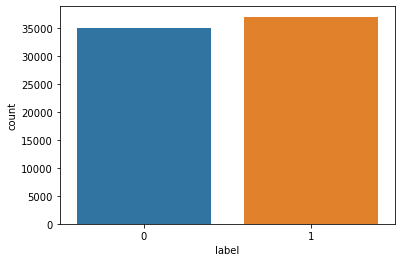

In [9]:
# Counting with plot both labels
sns.countplot(x="label", data=news_df)

In [10]:
news_df.dtypes

title    object
text     object
label     int64
dtype: object

In [11]:
from pyspark.ml.feature import Tokenizer
from pyspark.sql import SparkSession
import findspark
findspark.init()

In [12]:
spark = SparkSession.builder.appName("Tokens").getOrCreate()

In [13]:
news_spark = spark.read.csv("fake.csv",sep ='\t', header = True)

In [14]:
news_spark.show(50)

+---+--------------------+--------------------+-----+
|_c0|               title|                text|label|
+---+--------------------+--------------------+-----+
|  0|LAW ENFORCEMENT O...|No comment is exp...|    1|
|  1|                NONE|Did they post the...|    1|
|  2|UNBELIEVABLE! OBA...| Now, most of the...|    1|
|  3|Bobby Jindal, rai...|A dozen political...|    0|
|  4|SATAN 2: Russia u...|The RS-28 Sarmat ...|    1|
|  5|About Time! Chris...|All we can say on...|    1|
|  6|DR BEN CARSON TAR...|DR. BEN CARSON TE...|    1|
|  7|HOUSE INTEL CHAIR...|                NONE|    1|
|  8|Sports Bar Owner ...|The owner of the ...|    1|
|  9|Latest Pipeline L...|FILE – In this Se...|    1|
| 10| GOP Senator Just...|"The most punchab...|    1|
| 11|May Brexit offer ...|BRUSSELS (Reuters...|    0|
| 12|Schumer calls on ...|WASHINGTON (Reute...|    0|
| 13|WATCH: HILARIOUS ...|After watching th...|    1|
| 14|No Change Expecte...|As more and more ...|    0|
| 15|Billionaire Odebr...|RI